In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Checking for invalid entries

In [3]:
print(df.isna().sum(),'\n')
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [4]:
corr=df.drop(columns=['sales','salary']).corr(method='pearson')

In [5]:
import seaborn as sns
import matplotlib as plt

<Axes: >

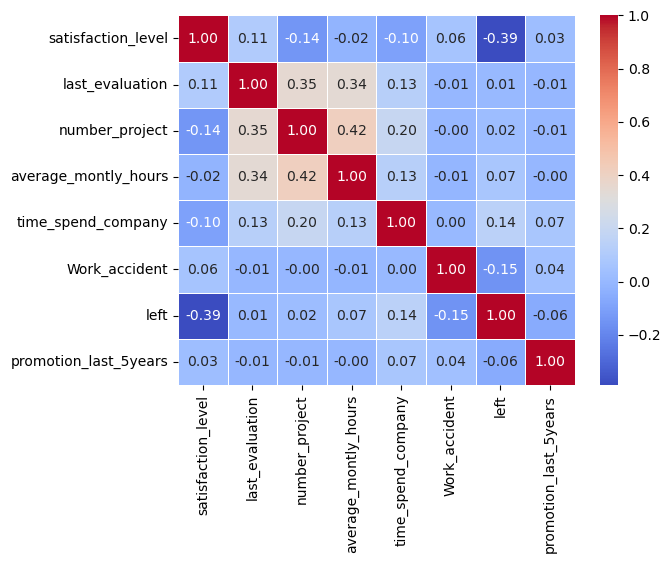

In [6]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

<Axes: xlabel='count', ylabel='satisfaction_level'>

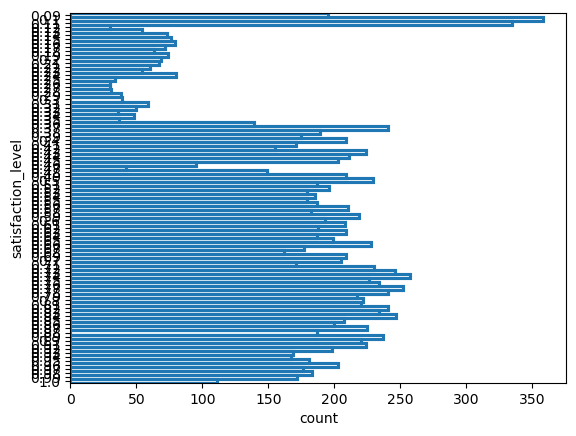

In [7]:
sns.barplot(pd.DataFrame(df.satisfaction_level.value_counts()),x='count',y='satisfaction_level',orient='h',fill=False,width=1)

<Axes: xlabel='count', ylabel='last_evaluation'>

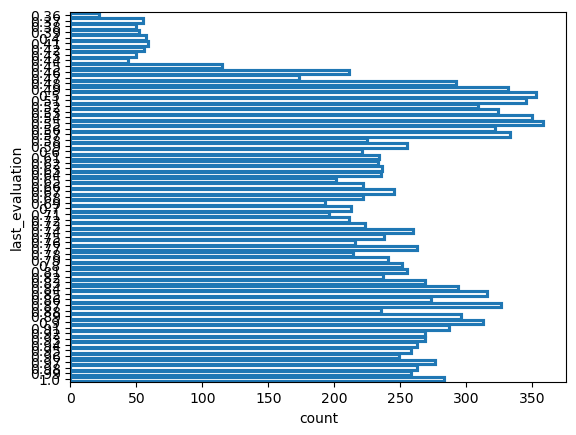

In [8]:
sns.barplot(pd.DataFrame(df.last_evaluation.value_counts()),x='count',y='last_evaluation',orient='h',fill=False)

<Axes: xlabel='count', ylabel='average_montly_hours'>

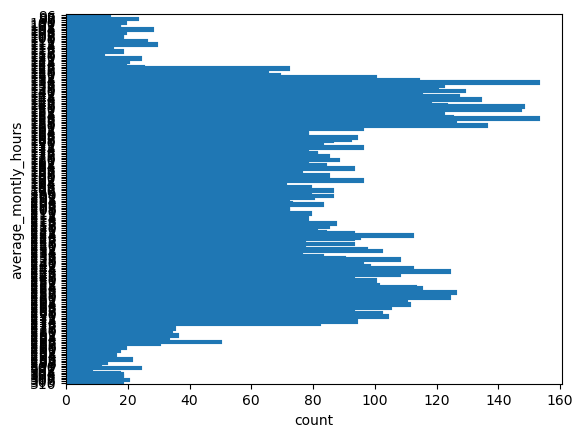

In [9]:
sns.barplot(pd.DataFrame(df.average_montly_hours.value_counts()),x='count',y='average_montly_hours',orient='h',fill=False,width=1)

<Axes: xlabel='number_project', ylabel='count'>

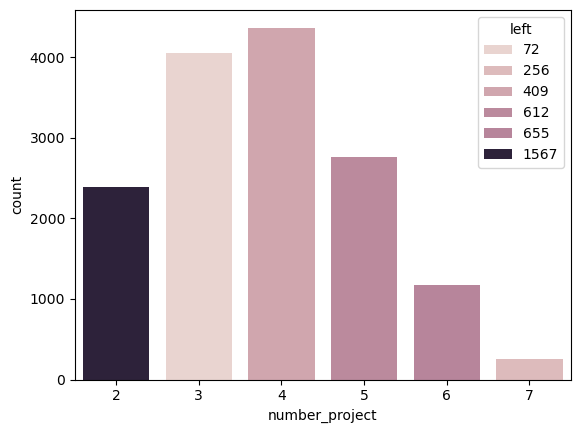

In [10]:
tmp1=df.groupby('number_project').sum()[['left']]
tmp2=pd.DataFrame(df.number_project.value_counts())
sns.barplot(pd.concat([tmp1,tmp2],axis=1),x='number_project',y='count',hue='left')

### Pre-Processing

In [11]:
df1=df.drop(columns='left')
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [12]:
X=pd.get_dummies(df1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14995,0.37,0.48,2,160,3,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14996,0.37,0.53,2,143,3,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14997,0.11,0.96,6,280,4,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False


In [13]:
Y=df[['left']]
Y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [14]:
df2=pd.get_dummies(df)

In [15]:
feature_df= df2
labels_df=df2.left

In [16]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_IT               14999 non-null  bool   
 9   sales_RandD            14999 non-null  bool   
 10  sales_accounting       14999 non-null  bool   
 11  sales_hr               14999 non-null  bool   
 12  sales_management       14999 non-null  bool   
 13  sales_marketing        14999 non-null  bool   
 14  sales_product_mng      14999 non-null  bool   
 15  sa

In [17]:
feature_df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [18]:
labels_df.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [20]:
transformed_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22856 entries, 0 to 22855
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     22856 non-null  float64
 1   last_evaluation        22856 non-null  float64
 2   number_project         22856 non-null  int64  
 3   average_montly_hours   22856 non-null  int64  
 4   time_spend_company     22856 non-null  int64  
 5   Work_accident          22856 non-null  int64  
 6   left                   22856 non-null  int64  
 7   promotion_last_5years  22856 non-null  int64  
 8   sales_IT               22856 non-null  bool   
 9   sales_RandD            22856 non-null  bool   
 10  sales_accounting       22856 non-null  bool   
 11  sales_hr               22856 non-null  bool   
 12  sales_management       22856 non-null  bool   
 13  sales_marketing        22856 non-null  bool   
 14  sales_product_mng      22856 non-null  bool   
 15  sa

In [21]:
transformed_feature_df.left.value_counts()

left
1    11428
0    11428
Name: count, dtype: int64

In [22]:
df3=transformed_feature_df
X=df3.drop(columns='left')
Y=df3.left

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
cv = KFold(n_splits=5, random_state=123, shuffle=True)

### Logistic Regression

### Confusion Matrix

col_0,0,1,All
left,,,
0,1810,476,2286
1,416,1870,2286
All,2226,2346,4572


              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2286
           1       0.80      0.82      0.81      2286

    accuracy                           0.80      4572
   macro avg       0.81      0.80      0.80      4572
weighted avg       0.81      0.80      0.80      4572

Accuracy: 0.8048993875765529
Precision: 0.8051095745927576
Recall: 0.8048993875765529
F1-score: 0.8048657810605225


### K-Fold

Accuracy: 0.8042969456536158


### ROC Curve

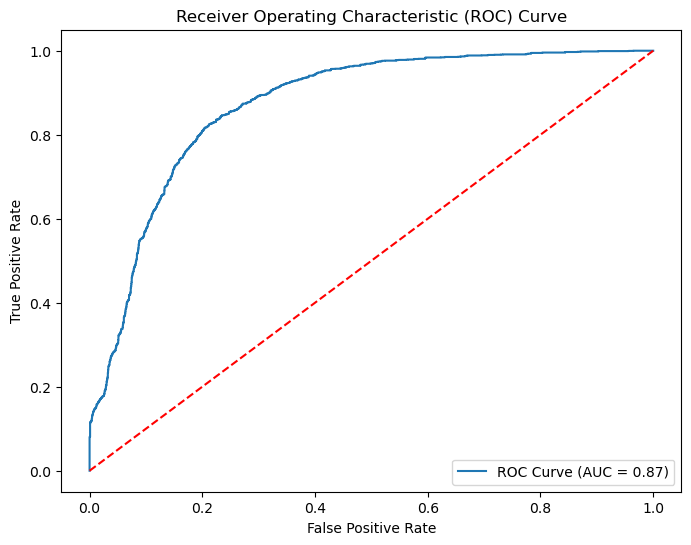

In [24]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y,)

# [2] Classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1500)

# [3] Fit
lr.fit(X_train, y_train)

# [4] Predict
pred = lr.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))
# Classification report
print(metrics.classification_report(y_test, pred))
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))
# Precision
print('Precision: {}'.format(metrics.precision_score(y_test, pred, average='weighted')))
# Recall
print('Recall: {}'.format(metrics.recall_score(y_test, pred, average='weighted')))
# F1-score
print('F1-score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))
display(Markdown('### K-Fold'))
scores = cross_val_score(lr, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy:',np.mean(scores))
display(Markdown('### ROC Curve'))
# ROC Curve
proba = lr.predict_proba(X_test)
proba_class1 = proba[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

### Random Forest

### Confusion Matrix

col_0,0,1,All
left,,,
0,2260,26,2286
1,127,2159,2286
All,2387,2185,4572


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2286
           1       0.99      0.94      0.97      2286

    accuracy                           0.97      4572
   macro avg       0.97      0.97      0.97      4572
weighted avg       0.97      0.97      0.97      4572

Accuracy: 0.9665354330708661
Precision: 0.9674479134211917
Recall: 0.9665354330708661
F1-score: 0.9665190939943809


### K-Fold

Accuracy: 0.969548523126799


### ROC Curve

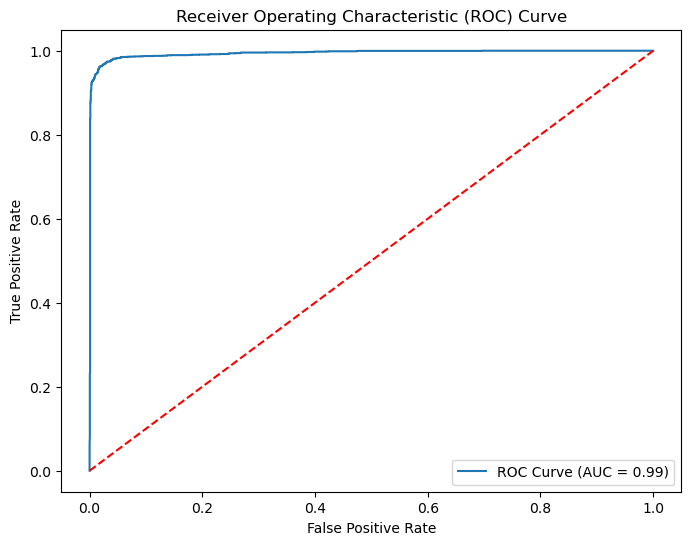

In [25]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y)

# [2] Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10)

# [3] Fit
rfc.fit(X_train, y_train)

# [4] Predict
pred = rfc.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))
# Classification report
# Classification report
print(metrics.classification_report(y_test, pred))
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))
# Precision
print('Precision: {}'.format(metrics.precision_score(y_test, pred, average='weighted')))
# Recall
print('Recall: {}'.format(metrics.recall_score(y_test, pred, average='weighted')))
# F1-score
print('F1-score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))

display(Markdown('### K-Fold'))
scores = cross_val_score(rfc, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy:',np.mean(scores))
display(Markdown('### ROC Curve'))
# ROC Curve
proba = rfc.predict_proba(X_test)
proba_class1 = proba[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

### Gradient Boost

### Confusion Matrix

col_0,0,1,All
left,,,
0,2230,56,2286
1,118,2168,2286
All,2348,2224,4572


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2286
           1       0.97      0.95      0.96      2286

    accuracy                           0.96      4572
   macro avg       0.96      0.96      0.96      4572
weighted avg       0.96      0.96      0.96      4572

Accuracy: 0.9619422572178478
Precision: 0.9622823036289878
Recall: 0.9619422572178478
F1-score: 0.9619352572856368


### K-Fold

Accuracy: 0.9621545583984238


### ROC Curve

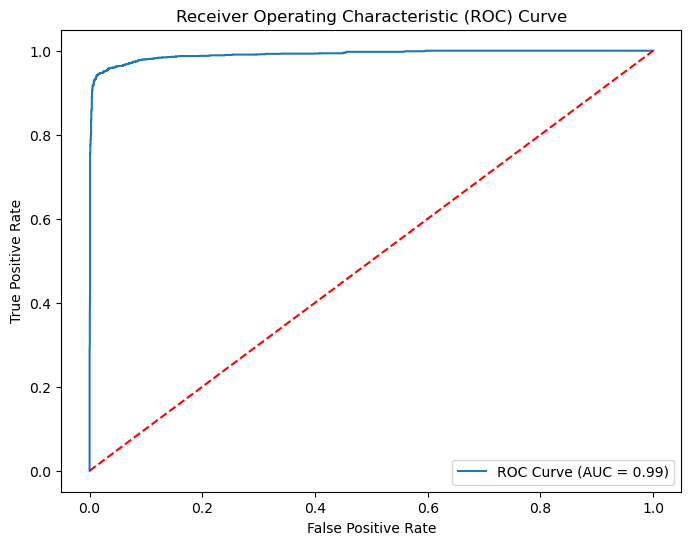

In [26]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y)

# [2] Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# [3] Fit
gbc.fit(X_train, y_train)

# [4] Predict
pred = gbc.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))
# Classification report
print(metrics.classification_report(y_test, pred))
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))
# Precision
print('Precision: {}'.format(metrics.precision_score(y_test, pred, average='weighted')))
# Recall
print('Recall: {}'.format(metrics.recall_score(y_test, pred, average='weighted')))
# F1-score
print('F1-score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))
display(Markdown('### K-Fold'))
scores = cross_val_score(gbc, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy:',np.mean(scores))
display(Markdown('### ROC Curve'))
# ROC Curve
proba = gbc.predict_proba(X_test)
proba_class1 = proba[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

#### From the confusion matrix precision should be used since the model needs to target the employees who would leave the company.The cost of not identifying a employee who would leave and not acting on it would be a loss for the company.

#### Random Forest classifier should be used.

### KNN Clusturing

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [52]:
X=df3.iloc[:,[0,1,6]].values

In [53]:
X

array([[0.38      , 0.53      , 1.        ],
       [0.8       , 0.86      , 1.        ],
       [0.11      , 0.88      , 1.        ],
       ...,
       [0.38794187, 0.50523488, 1.        ],
       [0.37      , 0.50911086, 1.        ],
       [0.4       , 0.54715868, 1.        ]])

In [54]:
clust = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = clust.fit_predict(X)
y_kmeans

array([2, 1, 1, ..., 2, 2, 2])

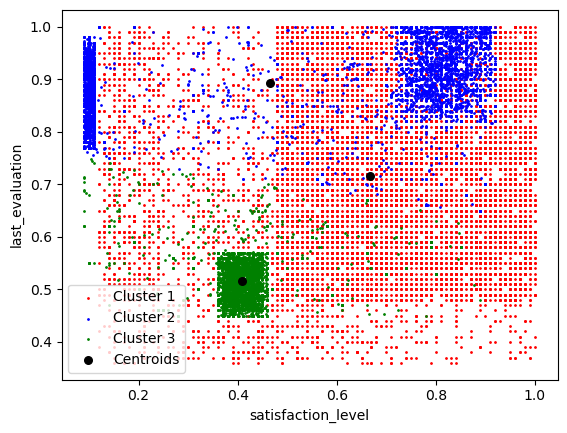

In [62]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()
plt.show()

### ////////////////////////////////////////////////////////////////////////////////////////////////////

In [68]:
yprob = rfc.predict_proba(X_test)

In [69]:
yprob

array([[0.01243494, 0.98756506],
       [0.9788307 , 0.0211693 ],
       [0.00507143, 0.99492857],
       ...,
       [0.8285952 , 0.1714048 ],
       [0.01466546, 0.98533454],
       [0.92340276, 0.07659724]])

In [75]:
yprob.round(2)

array([[0.01, 0.99],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [0.83, 0.17],
       [0.01, 0.99],
       [0.92, 0.08]])